In [1]:
import vehicles as v
from graphviz import Source, render

In [2]:
#Create manager that holds the threshold device
mng = v.manager(verbose = True)
#Create an input node
sns = v.sensor(mng,(1,1))
#Create threshold nodes
t1 = v.threshold(mng,1)
t2 = v.threshold(mng,1)
t3 = v.threshold(mng,2)
t4 = v.threshold(mng,2)
t5 = v.threshold(mng,1)
#Create output node/actuator
out = v.actuator(mng)

In [3]:
#Define connections between nodes 0-activate , 1-inhibit
t1.add_consumer(t2,1)# t1 --| t2
t2.add_consumer(t3,0)# t2 --> t3
t3.add_consumer(t4,0)# t3 --> t4
t4.add_consumer(t5,0)# t4 --> t5
t5.add_consumer(out,0)# t5 --> t_out
sns.add_consumer(t1,0,(0,0))# tin --> t1
sns.add_consumer(t2,0,(0,0))# tin --> t2
sns.add_consumer(t3,0,(0,0))# tin --> t3
sns.add_consumer(t4,0,(0,0))# tin --> t4
sns.add_consumer(t5,1,(0,0))# tin --| t5

In [4]:
#Threshold node names
[t1.name, t2.name, t3.name, t4.name, t5.name]

['thr_2UE0', 'thr_A1G8', 'thr_GYD7', 'thr_L6LH', 'thr_X46T']

In [5]:
#Current node values
mng.get_thresholds()

[0, 0, 0, 0, 0]

In [6]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_2UE0 --| thr_A1G8 with : wire_NDNL
thr_A1G8 --> thr_GYD7 with : wire_R89T
thr_GYD7 --> thr_L6LH with : wire_T6RC
thr_L6LH --> thr_X46T with : wire_0FGK
thr_X46T --> act_DRJQ with : wire_X02E


In [7]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator()
#Read the DOT file with graphviz
src = Source(dot)
#Create and save the graph
src.render(filename='p3p-network', directory='graph_output//p3p-demo', format='png', cleanup=True) 

digraph "device"{ graph [rankdir=LR] node [shape=circle] act_DRJQ [color=black style=filled shape=doublecircle label="" width=0.30] thr_2UE0 [label ="1"] thr_A1G8 [label ="1"] thr_GYD7 [label ="2"] thr_L6LH [label ="2"] thr_X46T [label ="1"] thr_2UE0 -> thr_A1G8 [arrowhead="tee"] thr_A1G8 -> thr_GYD7 [arrowhead="rnormal"] thr_GYD7 -> thr_L6LH [arrowhead="rnormal"] thr_L6LH -> thr_X46T [arrowhead="rnormal"] thr_X46T -> act_DRJQ [arrowhead="rnormal"] input_RFCR [color=black style=filled shape=circle label="" width=0.25] input_RFCR -> thr_2UE0 [arrowhead="rnormal"] input_RFCR -> thr_A1G8 [arrowhead="rnormal"] input_RFCR -> thr_GYD7 [arrowhead="rnormal"] input_RFCR -> thr_L6LH [arrowhead="rnormal"] input_RFCR -> thr_X46T [arrowhead="tee"]}


'graph_output//p3p-demo\\p3p-network.png'

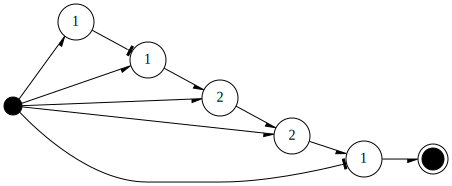

In [8]:
src

In [9]:
print(f"Initial thresholds : \n{mng.get_thresholds()}")

for i in range(3):
    #Send a signal
    sns.feed([[1]])
    #Combined update
    mng.update()
    
#Pause update without signal/signal=0
mng.update()
print(f"Final thresholds at time {mng.time} : \n{mng.get_thresholds()}")

Initial thresholds : 
[0, 0, 0, 0, 0]
[1]
Thresholds at time 0 after the signal: 
[1, 1, 1, 1, -1]
Threshold outputs at time 0
thr_2UE0 --| wire_NDNL
thr_A1G8 --> wire_R89T
Thresholds at time 0 after threshold update: 
[0, 0, 0, 0, 0]
Wire outputs at time 0
thr_2UE0 --| thr_A1G8 with : wire_NDNL
thr_A1G8 --> thr_GYD7 with : wire_R89T
thr_GYD7 --- thr_L6LH with : wire_T6RC
thr_L6LH --- thr_X46T with : wire_0FGK
thr_X46T --- act_DRJQ with : wire_X02E
Thresholds at time 0 after wire update: 
[0, -1, 1, 0, 0]
[1]
Thresholds at time 1 after the signal: 
[1, 0, 2, 1, -1]
Threshold outputs at time 1
thr_2UE0 --| wire_NDNL
thr_GYD7 --> wire_T6RC
Thresholds at time 1 after threshold update: 
[0, 0, 0, 0, 0]
Wire outputs at time 1
thr_2UE0 --| thr_A1G8 with : wire_NDNL
thr_A1G8 --- thr_GYD7 with : wire_R89T
thr_GYD7 --> thr_L6LH with : wire_T6RC
thr_L6LH --- thr_X46T with : wire_0FGK
thr_X46T --- act_DRJQ with : wire_X02E
Thresholds at time 1 after wire update: 
[0, -1, 0, 1, 0]
[1]
Thresholds a